In [1]:
import os

# Change the current working directory
os.chdir('/Users/payalteyung/Desktop/DA')

# Verify the change
print(os.getcwd()) 

/Users/payalteyung/Desktop/DA


In [2]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import dask.dataframe as dd
import seaborn as sns
from itertools import chain
import matplotlib.pyplot as plt 
import matplotlib.gridspec as gridspec
import plotly.graph_objects as go
from collections import Counter
from sklearn.metrics.pairwise import cosine_similarity
from matplotlib.colors import LinearSegmentedColormap
from matplotlib import colors as mcolors 
%matplotlib inline

In [3]:
columns_file1 = ["News ID", "Category", "Sub Category", "Title", "Abstract", "URL", "Title Entities", "Abstract Entities"]
columns_file2 = ["Impression ID", "User ID", "Time", "History", "Impressions"]

In [4]:
news = pd.read_csv('news.tsv', sep='\t', header=None, names=columns_file1)
behaviors = pd.read_csv('behaviors.tsv', sep='\t', header=None, names=columns_file2)

In [5]:
with open('entity_embedding.vec', 'r') as file:
    for _ in range(5):  # Adjust the range as needed
        print(file.readline().strip())

Q34433	0.017808	-0.073256	0.102521	-0.059926	-0.060665	0.027027	-0.091728	-0.003057	-0.170798	0.111819	0.006821	-0.049873	-0.050532	-0.003127	-0.074472	-0.115891	-0.067093	-0.095272	0.019178	-0.083725	-0.060890	0.017744	0.049417	-0.026014	-0.048549	0.017528	0.044163	0.022111	-0.081519	0.046278	-0.183939	-0.063143	-0.014518	-0.080644	-0.099994	0.085905	-0.083003	-0.092844	-0.216481	0.125441	0.179819	0.036735	-0.085375	0.021276	-0.154971	0.039009	0.016059	0.067725	-0.148213	0.158773	-0.028527	0.125790	0.006361	0.067541	0.077552	0.060792	-0.044511	-0.005862	-0.068080	-0.063204	-0.094127	0.115441	-0.016472	0.106616	0.047839	-0.151805	-0.111083	-0.142330	-0.120680	-0.050393	-0.073787	0.017424	-0.081620	0.062599	-0.022102	-0.102688	-0.128149	-0.075895	0.095134	0.000984	0.010143	-0.068552	-0.026573	0.019735	-0.000981	-0.126635	0.008300	0.170557	0.002250	-0.157175	-0.077962	0.013433	0.045894	-0.071253	0.086445	-0.120466	0.059235	-0.071865	0.058854	0.024765
Q41	-0.063388	-0.181451	0.057501	-0.0

In [6]:
entity_embedding = pd.read_csv('entity_embedding.vec', delim_whitespace=True, header=None)
relation_embedding = pd.read_csv('relation_embedding.vec', delim_whitespace=True, header=None)

In [7]:
# Separate entity IDs and embeddings
entity_ids = entity_embedding.iloc[:, 0] 
entity_embeddings = entity_embedding.iloc[:, 1:].values 

In [8]:
print("Entity IDs:", entity_ids.head())
print("Entity Embeddings Shape:", entity_embeddings.shape)

Entity IDs: 0    Q34433
1       Q41
2    Q56037
3     Q1860
4     Q7737
Name: 0, dtype: object
Entity Embeddings Shape: (42007, 100)


In [9]:
print(relation_embedding.head())

    0         1         2         3         4         5         6         7    \
0   P31 -0.073467 -0.132227  0.034173 -0.032769  0.008289 -0.107088 -0.031712   
1   P21 -0.078436  0.108589 -0.049429 -0.131355  0.049300 -0.094605 -0.101469   
2  P106 -0.052137  0.052444 -0.019886 -0.152309  0.014144 -0.180491 -0.132198   
3  P735 -0.051398  0.056219  0.068029 -0.137717 -0.030050  0.061566 -0.103184   
4  P108  0.091231  0.022526  0.059349 -0.141853  0.035025 -0.111040 -0.127337   

        8         9    ...       91        92        93        94        95   \
0 -0.039581  0.101882  ... -0.045641 -0.050068 -0.053686 -0.045389 -0.037017   
1  0.127802 -0.081245  ... -0.151203  0.074341 -0.030571 -0.137183  0.045598   
2  0.063082  0.085229  ... -0.088902 -0.058958 -0.032021 -0.147213  0.082776   
3 -0.074124 -0.118975  ... -0.096461 -0.092234  0.056870  0.013640  0.042696   
4  0.047645 -0.172328  ...  0.026855 -0.046994 -0.056248 -0.146538  0.121375   

        96        97        98  

In [10]:
news.head()

,News ID,Category,Sub Category,Title,Abstract,URL,Title Entities,Abstract Entities
0,N88753,lifestyle,lifestyleroyals,"The Brands Queen Elizabeth, Prince Charles, an...","Shop the notebooks, jackets, and more that the...",https://assets.msn.com/labs/mind/AAGH0ET.html,"[{""Label"": ""Prince Philip, Duke of Edinburgh"",...",[]
1,N45436,news,newsscienceandtechnology,Walmart Slashes Prices on Last-Generation iPads,Apple's new iPad releases bring big deals on l...,https://assets.msn.com/labs/mind/AABmf2I.html,"[{""Label"": ""IPad"", ""Type"": ""J"", ""WikidataId"": ...","[{""Label"": ""IPad"", ""Type"": ""J"", ""WikidataId"": ..."
2,N23144,health,weightloss,50 Worst Habits For Belly Fat,These seemingly harmless habits are holding yo...,https://assets.msn.com/labs/mind/AAB19MK.html,"[{""Label"": ""Adipose tissue"", ""Type"": ""C"", ""Wik...","[{""Label"": ""Adipose tissue"", ""Type"": ""C"", ""Wik..."
3,N86255,health,medical,Dispose of unwanted prescription drugs during ...,NaN,https://assets.msn.com/labs/mind/AAISxPN.html,"[{""Label"": ""Drug Enforcement Administration"", ...",[]
4,N93187,news,newsworld,The Cost of Trump's Aid Freeze in the Trenches...,Lt. Ivan Molchanets peeked over a parapet of s...,https://assets.msn.com/labs/mind/AAJgNsz.html,[],"[{""Label"": ""Ukraine"", ""Type"": ""G"", ""WikidataId..."


In [11]:
behaviors.head()

,Impression ID,User ID,Time,History,Impressions
0,1,U87243,11/10/2019 11:30:54 AM,N8668 N39081 N65259 N79529 N73408 N43615 N2937...,N78206-0 N26368-0 N7578-0 N58592-0 N19858-0 N5...
1,2,U598644,11/12/2019 1:45:29 PM,N56056 N8726 N70353 N67998 N83823 N111108 N107...,N47996-0 N82719-0 N117066-0 N8491-0 N123784-0 ...
2,3,U532401,11/13/2019 11:23:03 AM,N128643 N87446 N122948 N9375 N82348 N129412 N5...,N103852-0 N53474-0 N127836-0 N47925-1
3,4,U593596,11/12/2019 12:24:09 PM,N31043 N39592 N4104 N8223 N114581 N92747 N1207...,N38902-0 N76434-0 N71593-0 N100073-0 N108736-0...
4,5,U239687,11/14/2019 8:03:01 PM,N65250 N122359 N71723 N53796 N41663 N41484 N11...,N76209-0 N48841-0 N67937-0 N62235-0 N6307-0 N3...


In [12]:
news.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101527 entries, 0 to 101526
Data columns (total 8 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   News ID            101527 non-null  object
 1   Category           101527 non-null  object
 2   Sub Category       101527 non-null  object
 3   Title              101527 non-null  object
 4   Abstract           96112 non-null   object
 5   URL                101527 non-null  object
 6   Title Entities     101524 non-null  object
 7   Abstract Entities  101521 non-null  object
dtypes: object(8)
memory usage: 6.2+ MB


In [13]:
behaviors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2232748 entries, 0 to 2232747
Data columns (total 5 columns):
 #   Column         Dtype 
---  ------         ----- 
 0   Impression ID  int64 
 1   User ID        object
 2   Time           object
 3   History        object
 4   Impressions    object
dtypes: int64(1), object(4)
memory usage: 85.2+ MB


In [14]:
news.describe()

,News ID,Category,Sub Category,Title,Abstract,URL,Title Entities,Abstract Entities
count,101527,101527,101527,101527,96112,101527,101524,101521
unique,101527,18,285,98388,91654,101526,66863,72168
top,N88753,sports,newsus,Powerball Winning Numbers For 10/26/2019 Drawi...,What's the weather today? What's the weather f...,[],[],[]
freq,1,32020,14467,27,435,2,26053,25480


In [15]:
behaviors.describe(include='all')

,Impression ID,User ID,Time,History,Impressions
count,2.232748e+06,2232748,2232748,2186683,2232748
unique,NaN,711222,453122,689269,1972081
top,NaN,U536528,11/11/2019 11:21:20 AM,N67369,N98178-1 N32154-0
freq,NaN,106,29,369,6130
mean,1.116374e+06,NaN,NaN,NaN,NaN
std,6.445390e+05,NaN,NaN,NaN,NaN
min,1.000000e+00,NaN,NaN,NaN,NaN
25%,5.581878e+05,NaN,NaN,NaN,NaN
50%,1.116374e+06,NaN,NaN,NaN,NaN
75%,1.674561e+06,NaN,NaN,NaN,NaN


# Data Cleaning

Converting the datatypes into relevant datetypes

In [16]:
#Converting Time to datetime
behaviors['Time'] = pd.to_datetime(behaviors['Time'], errors='coerce')

In [17]:
# Convert History to list
behaviors['History'] = behaviors['History'].apply(lambda x: x.split() if pd.notnull(x) else [])

In [18]:
behaviors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2232748 entries, 0 to 2232747
Data columns (total 5 columns):
 #   Column         Dtype         
---  ------         -----         
 0   Impression ID  int64         
 1   User ID        object        
 2   Time           datetime64[ns]
 3   History        object        
 4   Impressions    object        
dtypes: datetime64[ns](1), int64(1), object(3)
memory usage: 85.2+ MB


Handling missing values

In [19]:
#Finding missing values
news.isnull()

,News ID,Category,Sub Category,Title,Abstract,URL,Title Entities,Abstract Entities
0,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False
3,False,False,False,False,True,False,False,False
4,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...
101522,False,False,False,False,False,False,False,False
101523,False,False,False,False,False,False,False,False
101524,False,False,False,False,False,False,False,False
101525,False,False,False,False,True,False,False,False


In [20]:
behaviors.isnull()

,Impression ID,User ID,Time,History,Impressions
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
...,...,...,...,...,...
2232743,False,False,False,False,False
2232744,False,False,False,False,False
2232745,False,False,False,False,False
2232746,False,False,False,False,False


In [21]:
news.isnull().sum()

News ID                 0
Category                0
Sub Category            0
Title                   0
Abstract             5415
URL                     0
Title Entities          3
Abstract Entities       6
dtype: int64

In [22]:
behaviors.isnull().sum()

Impression ID    0
User ID          0
Time             0
History          0
Impressions      0
dtype: int64

In [23]:
news = news.drop(columns=["Abstract","Abstract Entities"], errors="ignore")  

In [24]:
#removing rows with missing values in title entities
news = news.dropna(subset=['Title Entities'])

In [25]:
news.isnull().sum()

News ID           0
Category          0
Sub Category      0
Title             0
URL               0
Title Entities    0
dtype: int64

# Creating relationships between behaviors and news articles.

In [26]:
# Explode History
history_exploded = behaviors.explode('History')
history_exploded.rename(columns={'History': 'News ID'}, inplace=True)

In [27]:
# Convert to Dask DataFrame
dbehaviors = dd.from_pandas(behaviors, npartitions=10)

In [28]:
def process_impressions(row):
    impressions = str(row['Impressions']).split(' ')
    return [{'User ID': row['User ID'], 'News ID': imp.split('-')[0], 'Clicked': int(imp.split('-')[1])} for imp in impressions]

exploded = dbehaviors.map_partitions(
    lambda df: pd.DataFrame(list(chain.from_iterable(df.apply(process_impressions, axis=1)))),
    meta={'User ID': 'str', 'News ID': 'str', 'Clicked': 'int'}
)

In [29]:
print(exploded.columns)

Index(['User ID', 'News ID', 'Clicked'], dtype='object')


In [30]:
# Sample a fraction of the impressions for performance improvement
impressions_exploded = exploded.sample(frac=0.1, random_state=42).compute()

In [31]:
print(impressions_exploded.head()) 

         User ID News ID  Clicked
4820594  U365152  N19292        0
2887312  U323184  N60110        0
730562   U172079  N43982        0
2575218   U58642  N73155        0
2434509  U652019  N37544        0


In [32]:
# Compute total number of clicked and non-clicked
click_counts = impressions_exploded.groupby('Clicked').size().reset_index(name='Count')

In [33]:
# Display the result
print(click_counts)

   Clicked    Count
0        0  8012254
1        1   338483


# Group Categories

In [34]:
string_categories = news['Sub Category'][news['Sub Category'].apply(lambda x: isinstance(x, str))]
unique_string_categories = string_categories.unique()
print("The unique string categories are:")
print(unique_string_categories)

The unique string categories are:
['lifestyleroyals' 'newsscienceandtechnology' 'weightloss' 'medical'
 'newsworld' 'voices' 'cardio' 'football_nfl' 'weathertopstories' 'gaming'
 'recipes' 'lifestylelovesex' 'nutrition' 'autosenthusiasts' 'autossports'
 'wellness' 'health-news' 'celebrity' 'travelarticle' 'autossuvs'
 'newspolitics' 'more_sports' 'traveltripideas' 'animals' 'autosnews'
 'newsbusiness' 'golf' 'newstrends' 'lifestylepetsanimals'
 'finance-insurance' 'football_ncaa' 'lifestylebuzz' 'mma' 'fitness'
 'newsus' 'tv-gallery' 'tvnews' 'lifestylehoroscope' 'basketball_nba'
 'news' 'shop-all' 'newsphotos' 'lifestylemindandsoul' 'travelnews'
 'basketball_ncaa' 'finance-real-estate' 'quickandeasy' 'tv-celebrity'
 'financenews' 'lifestyleparenting' 'movies-gallery' 'racing'
 'tipsandtricks' 'baseball_mlb' 'musicnews' 'autosbuying' 'shop-apparel'
 'autostrucks' 'lifestyledidyouknow' 'finance-career-education'
 'finance-retirement' 'restaurantsandnews' 'finance-saving-investing'
 'soc

In [35]:
category_mapping = {
    'politics': ['newsworld','newsus','newspolitics','lifestyleroyals','newsbusiness','newstrends',
                'newsopinion','newscrime','newsfactcheck','newsnational','newsworldpolitics','newsrealestate',
                'newslocalpolitics','elections-2020-us','narendramodi_opinion','causes-poverty','middleeast-top-stories'],
    'sports': ['sportsgeneral', 'sportsfootball', 'sportsbasketball','football_nfl','football_ncaa','soccer',
              'golf','mma','basketball_nba','basketball_ncaa','baseball_mlb','tennis','icehockey_nhl','boxing',
              'more_sports','soccer_mls','basketball_wnba','boxing-mma','mmaufc','soccer_epl','autosenthusiasts',
              'autossports','racing','golfvideos','soccer_fifa_wwc','basketball_ncaa_videos','basketball_nba_videos',
              'football_ncaa_videos','football_nfl_videos','othersports','olympics-videos','games','games-news'],
    'technology':['newsscienceandtechnology', 'techreviews', 'techgadgets','science','technology','finance-technology',
                  'autoscartech','autosresearchguides','newstechnology','technologyinvesting','shop-computers-electronics',
                  'movievideo','videos','musicvideos','factcheck','autosreview','tvvideos','music-gallery','autosresearch',
                  'newsscience'],
    'finance' : ['finance-real-estate','finance-homesandpropertysection','finance-credit',
                'finance-startinvesting','finance-auto-insurance','causes-disaster-relief',
                'finance-insidetheticker','finance-education','finance-savingsrates','finance-healthcare',
               'finance-top-stocks','spendingandborrowing','finance-auto-insurance','finance-mutual-funds',
                'finance-home-loans','finance-video','finance-small-business','finance-billstopay','finance-taxes',
                'finance-savemoney','finance-insurance','finance-career-education','finance-saving-investing',
                'finance-companies','personalfinance','finance-career','finance-technology','finance-retirement']
}


In [36]:
# Map categories to main groups
def map_to_main_category(sub_category):
    for main_category, sub_categories in category_mapping.items():
        if sub_category in sub_categories:
            return main_category
    return 'others'

news['Main Category'] = news['Sub Category'].apply(map_to_main_category)

In [37]:
news.head()

,News ID,Category,Sub Category,Title,URL,Title Entities,Main Category
0,N88753,lifestyle,lifestyleroyals,"The Brands Queen Elizabeth, Prince Charles, an...",https://assets.msn.com/labs/mind/AAGH0ET.html,"[{""Label"": ""Prince Philip, Duke of Edinburgh"",...",politics
1,N45436,news,newsscienceandtechnology,Walmart Slashes Prices on Last-Generation iPads,https://assets.msn.com/labs/mind/AABmf2I.html,"[{""Label"": ""IPad"", ""Type"": ""J"", ""WikidataId"": ...",technology
2,N23144,health,weightloss,50 Worst Habits For Belly Fat,https://assets.msn.com/labs/mind/AAB19MK.html,"[{""Label"": ""Adipose tissue"", ""Type"": ""C"", ""Wik...",others
3,N86255,health,medical,Dispose of unwanted prescription drugs during ...,https://assets.msn.com/labs/mind/AAISxPN.html,"[{""Label"": ""Drug Enforcement Administration"", ...",others
4,N93187,news,newsworld,The Cost of Trump's Aid Freeze in the Trenches...,https://assets.msn.com/labs/mind/AAJgNsz.html,[],politics


In [38]:
# Filter out "others"
news = news[news['Main Category'] != 'others']

In [39]:
news.shape

(68633, 7)

# EDA

In [40]:
# Article length preferences
news['Article Length'] = news['Title'].apply(lambda x: len(x.split()))
article_length_stats = news.groupby('Main Category')['Article Length'].describe()

In [41]:
print(article_length_stats)

                 count       mean       std  min  25%   50%   75%   max
Main Category                                                          
finance         3457.0  10.342493  3.101788  3.0  8.0  10.0  12.0  57.0
politics       29448.0  10.870687  3.261503  1.0  9.0  10.0  13.0  95.0
sports         32283.0  10.735898  3.256226  2.0  9.0  10.0  13.0  35.0
technology      3445.0  10.274020  3.160869  2.0  8.0  10.0  12.0  30.0


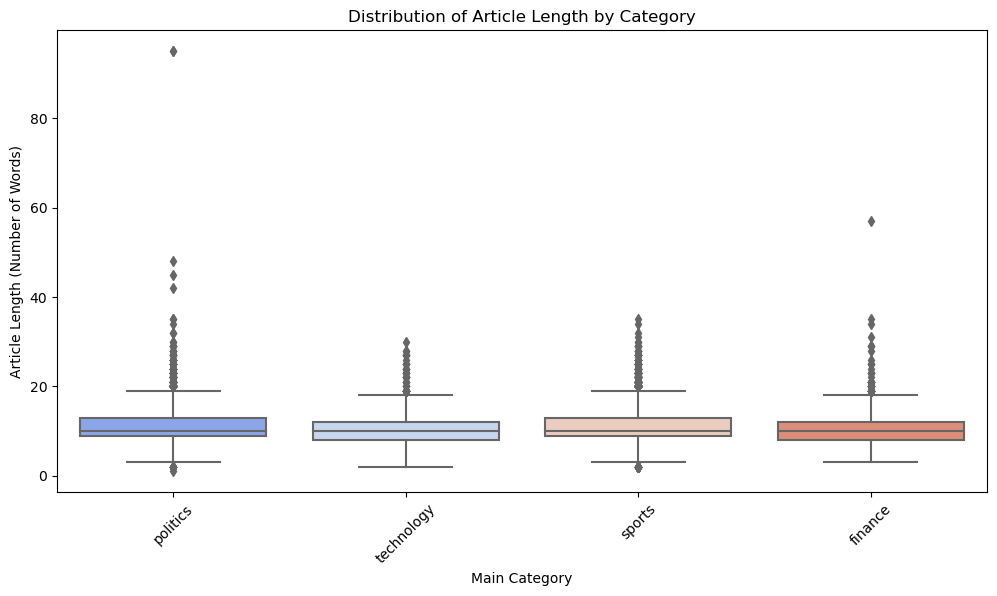

In [42]:
plt.figure(figsize=(12, 6))
sns.boxplot(x=news['Main Category'], y=news['Article Length'], palette='coolwarm')
plt.xlabel('Main Category')
plt.ylabel('Article Length (Number of Words)')
plt.title('Distribution of Article Length by Category')
plt.xticks(rotation=45)
plt.show()

In [43]:
# Retain necessary columns
news = news[['News ID', 'Main Category', 'Sub Category', 'Title Entities']]

In [44]:
history_exploded = history_exploded.sample(frac=0.1, random_state=42)

In [45]:
# Combine History and Impressions for Single Merge
all_data = pd.concat([history_exploded, impressions_exploded], ignore_index=True)
all_data = all_data.merge(news, on='News ID', how='left')

In [46]:
all_data.tail()

,Impression ID,User ID,Time,News ID,Impressions,Clicked,Main Category,Sub Category,Title Entities
15718325,NaN,U59900,NaT,N55189,NaN,0.0,NaN,NaN,NaN
15718326,NaN,U690765,NaT,N80719,NaN,0.0,politics,newsus,"[{""Label"": ""Southwest Florida"", ""Type"": ""U"", ""..."
15718327,NaN,U135359,NaT,N105407,NaN,0.0,politics,newsus,"[{""Label"": ""Michigan"", ""Type"": ""G"", ""WikidataI..."
15718328,NaN,U398998,NaT,N41861,NaN,0.0,NaN,NaN,NaN
15718329,NaN,U72098,NaT,N84430,NaN,0.0,finance,finance-retirement,"[{""Label"": ""Social Security (United States)"", ..."


In [47]:
all_data.shape

(15718330, 9)

In [48]:
all_data.isnull().sum()

Impression ID     8350737
User ID                 0
Time              8350737
News ID              4691
Impressions       8350737
Clicked           7367593
Main Category     7754446
Sub Category      7754446
Title Entities    7754446
dtype: int64

In [49]:
# Drop rows with nulls in critical columns
all_data = all_data.dropna(subset=['Main Category', 'Clicked'])

In [50]:
all_data.shape

(3974766, 9)

In [51]:
# Popular Categories
popular_categories = all_data['Main Category'].value_counts().reset_index()
popular_categories.columns = ['Main Category', 'Views']

In [52]:
print(popular_categories)

  Main Category    Views
0      politics  2234053
1        sports   933467
2       finance   615569
3    technology   191677


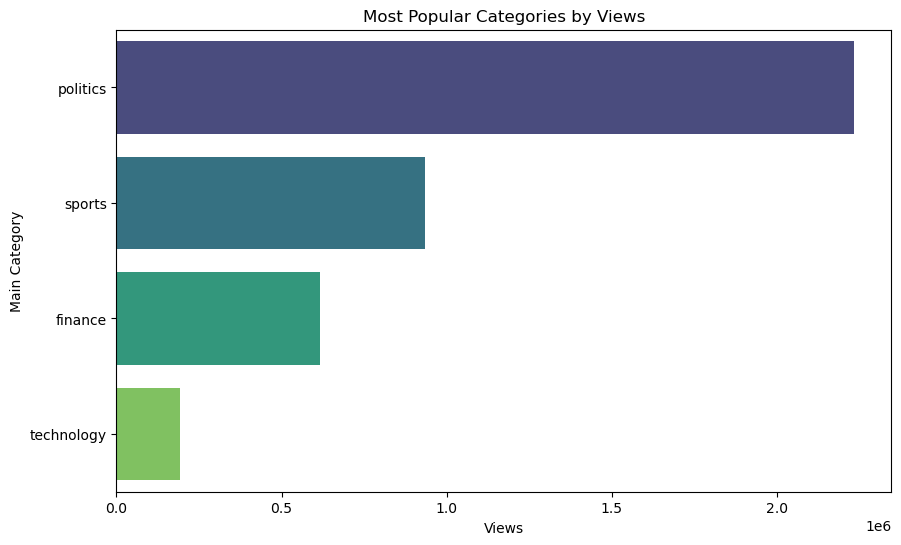

In [53]:
plt.figure(figsize=(10, 6))
sns.barplot(data=popular_categories, x='Views', y='Main Category', palette='viridis')
plt.title('Most Popular Categories by Views')
plt.xlabel('Views')
plt.ylabel('Main Category')
plt.show()

In [54]:
# CTR by Main Category
ctr_by_category = all_data.groupby('Main Category')['Clicked'].mean().reset_index()
ctr_by_category.columns = ['Main Category', 'CTR']

In [55]:
print(ctr_by_category )

  Main Category       CTR
0       finance  0.039159
1      politics  0.046943
2        sports  0.044197
3    technology  0.023602


Finance: The CTR is 0.039159, meaning 3.9% of the impressions for finance content resulted in clicks.

Politics: The CTR is 0.046943, meaning 4.7% of impressions led to clicks, the highest among the listed categories.

Sports: The CTR is 0.044197, indicating 4.4% of impressions resulted in clicks.

Technology: The CTR is 0.023602, showing the lowest engagement, with only 2.4% of impressions leading to clicks.

    
Politics content appears to be the most engaging for users, having the highest CTR.

Technology content has the lowest engagement, suggesting potential room for improvement in how this category 
is presented or its content quality.

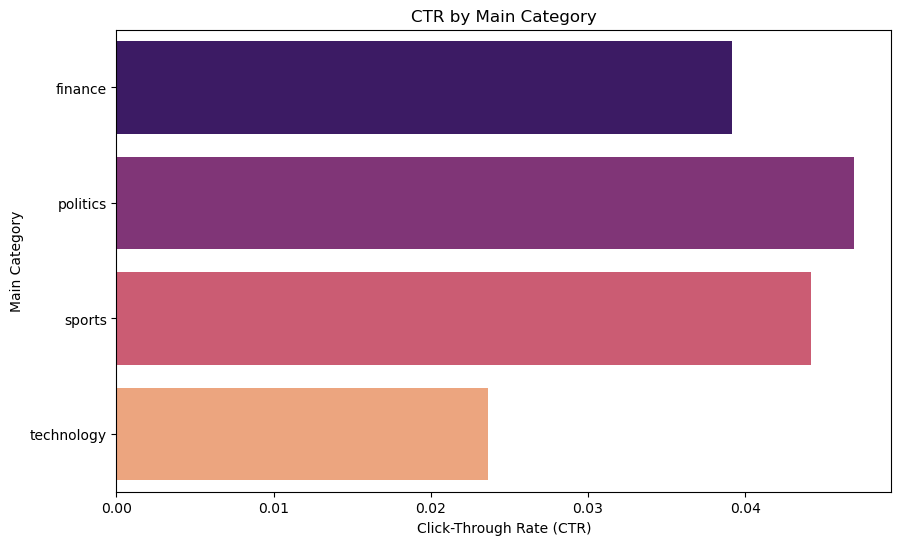

In [56]:
plt.figure(figsize=(10, 6))
sns.barplot(data=ctr_by_category, x='CTR', y='Main Category', palette='magma')
plt.title('CTR by Main Category')
plt.xlabel('Click-Through Rate (CTR)')
plt.ylabel('Main Category')
plt.show()

In [57]:
# Subcategory Trends
ctr_by_subcategory = all_data.groupby('Sub Category')['Clicked'].mean().reset_index()
ctr_by_subcategory.columns = ['Sub Category', 'CTR']

In [58]:
print(ctr_by_subcategory)

            Sub Category       CTR
0       autosenthusiasts  0.033018
1          autosresearch  0.016411
2    autosresearchguides  0.014569
3            autosreview  0.000000
4            autossports  0.025444
..                   ...       ...
63  spendingandborrowing  0.000000
64   technologyinvesting  0.000000
65                tennis  0.056159
66              tvvideos  0.046395
67                videos  0.017788

[68 rows x 2 columns]


In [59]:
# Most Frequent Entities
news['Title Entities'] = news['Title Entities'].apply(lambda x: eval(x) if x else [])
all_entities = [entity['Label'] for entities in news['Title Entities'] for entity in entities]
entity_counts = pd.DataFrame(Counter(all_entities).most_common(50), columns=['Entity', 'Frequency'])

In [60]:
print(entity_counts)

                              Entity  Frequency
0                       Donald Trump       1802
1           National Football League        929
2               New England Patriots        830
3                     Houston Astros        734
4                   Cleveland Browns        545
5                   New York Yankees        510
6                Pittsburgh Steelers        484
7                Philadelphia Eagles        465
8                     Dallas Cowboys        445
9                   Baltimore Ravens        439
10                     Detroit Lions        431
11              Washington Nationals        428
12                     New York Jets        408
13                Kansas City Chiefs        398
14                        California        379
15                    Miami Dolphins        376
16                      World Series        369
17                Indianapolis Colts        367
18                Cincinnati Bengals        360
19  Democratic Party (United States)    

In [78]:
# Most Frequent Entities by Category
category_entity_counts = {}
for category, group in news.groupby('Main Category'):
    all_entities = [entity['Label'] for entities in group['Title Entities'] for entity in entities]
    category_entity_counts[category] = Counter(all_entities)


In [82]:
category_entity_df = pd.DataFrame([
    {"Category": category, "Entity": entity, "Frequency": freq}
    for category, counter in category_entity_counts.items()
    for entity, freq in counter.most_common(5)
])
print(category_entity_df)


      Category                            Entity  Frequency
0      finance                     United States         57
1      finance                         Microsoft         56
2      finance                  Amazon (company)         44
3      finance                            Boeing         31
4      finance                    Boeing 737 MAX         29
5     politics                      Donald Trump       1708
6     politics  Democratic Party (United States)        356
7     politics  Republican Party (United States)        347
8     politics                        California        324
9     politics                           Ukraine        311
10      sports          National Football League        921
11      sports              New England Patriots        829
12      sports                    Houston Astros        726
13      sports                  Cleveland Browns        544
14      sports                  New York Yankees        507
15  technology                          

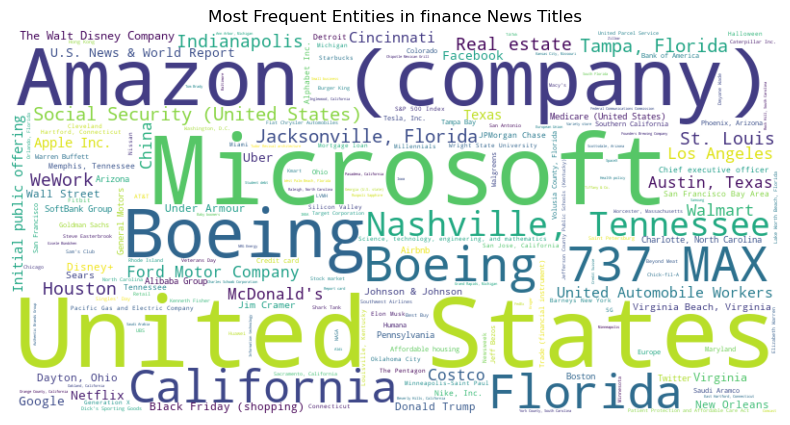

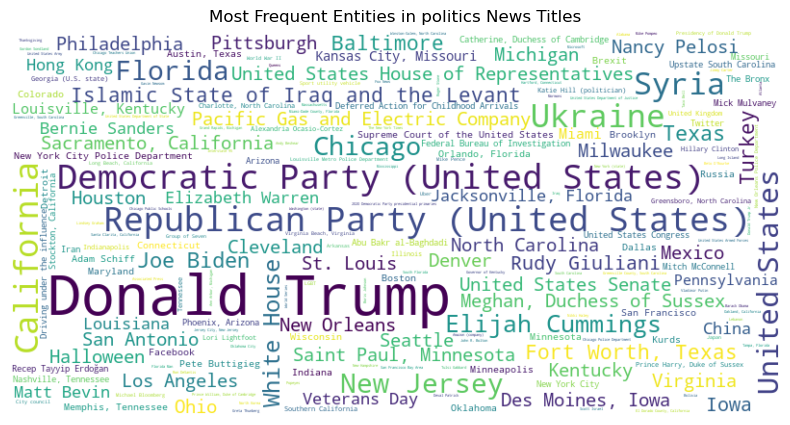

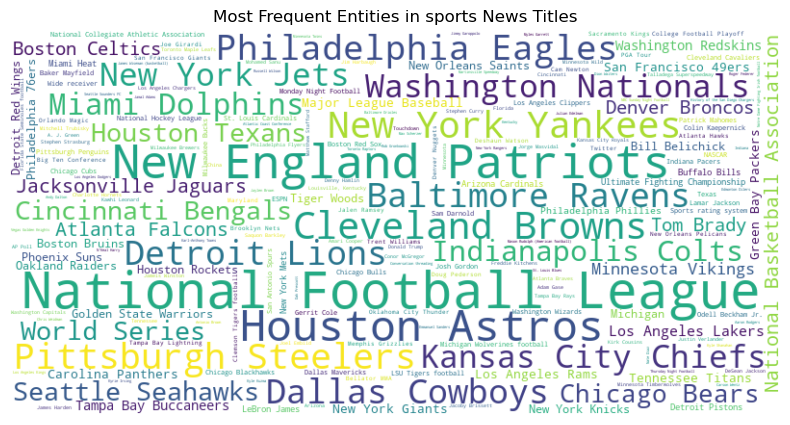

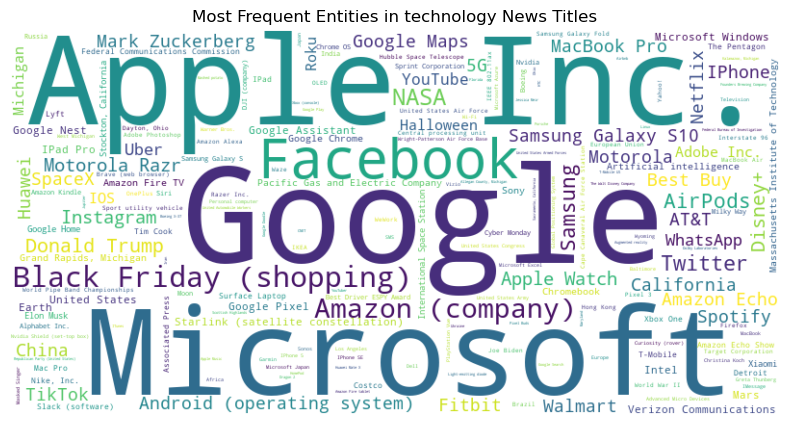

In [81]:
for category, counter in category_entity_counts.items():
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(counter)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f'Most Frequent Entities in {category} News Titles')
    plt.show()

In [61]:
# User ID vs News ID Analysis
user_news_counts = behaviors.explode('History').groupby(['User ID', 'History']).size().reset_index(name='Count')
user_news_counts.rename(columns={'History': 'News ID'}, inplace=True)
user_news_counts = user_news_counts.nlargest(50, 'Count')

In [62]:
print(user_news_counts)

          User ID  News ID  Count
8987460   U536528   N69936   2756
8987414   U536528   N50148   2650
8987451   U536528   N65661   2438
8987518   U536528   N91597   2226
8987321   U536528  N121592   1908
8987352   U536528   N19058   1908
8987423   U536528   N53933   1484
8987323   U536528  N122324   1378
8987521   U536528   N92655   1378
8987370   U536528   N27352   1272
8987392   U536528   N38567   1272
8987411   U536528   N48501   1272
8987458   U536528   N68960   1166
8987326   U536528  N124555   1060
8987346   U536528    N1596   1060
8987279   U536528  N107705    848
8987389   U536528   N37820    848
8987363   U536528   N23264    742
8987440   U536528   N60457    742
8987447   U536528   N63494    742
8987490   U536528   N79909    742
8987537   U536528   N96884    742
8987538   U536528    N9690    742
8987316   U536528  N120031    636
8987341   U536528   N14509    636
8987353   U536528   N19175    636
8987358   U536528   N20251    636
8987372   U536528   N27703    636
8987491   U536

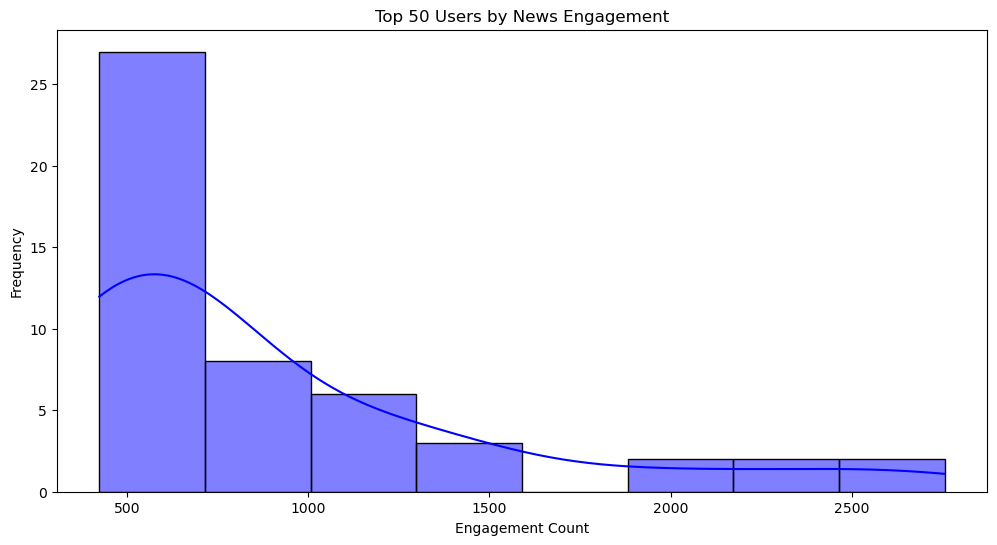

In [63]:
plt.figure(figsize=(12, 6))
sns.histplot(user_news_counts['Count'], kde=True, color='blue')
plt.title('Top 50 Users by News Engagement')
plt.xlabel('Engagement Count')
plt.ylabel('Frequency')
plt.show()

In [64]:
# Engagement by User
if 'User ID' in impressions_exploded.columns:
    user_engagement = impressions_exploded.groupby('User ID')['Clicked'].agg(['sum', 'count']).reset_index()
    user_engagement.columns = ['User ID', 'Total Clicks', 'Total Impressions']
    user_engagement['CTR'] = user_engagement['Total Clicks'] / user_engagement['Total Impressions']
    
    top_50_users = user_engagement.sort_values(by='Total Clicks', ascending=False).head(50)
else:
    print("Warning: 'User ID' column missing in impressions_exploded")

In [65]:
print(top_50_users)

        User ID  Total Clicks  Total Impressions       CTR
539968  U641296            17                239  0.071130
84435   U184531            17                205  0.082927
544435  U645755            17                230  0.073913
23728   U123834            15                177  0.084746
229379  U329796            15                 56  0.267857
41960   U142016            14                 47  0.297872
7325    U107360            14                105  0.133333
14759   U114828            14                 87  0.160920
576760  U678259            14                137  0.102190
41530    U14159            14                115  0.121739
242952  U343364            14                 53  0.264151
9960    U110010            13                192  0.067708
76731   U176820            13                156  0.083333
372747  U473598            13                 89  0.146067
483302  U584485            13                 49  0.265306
215500   U31589            13                100  0.1300

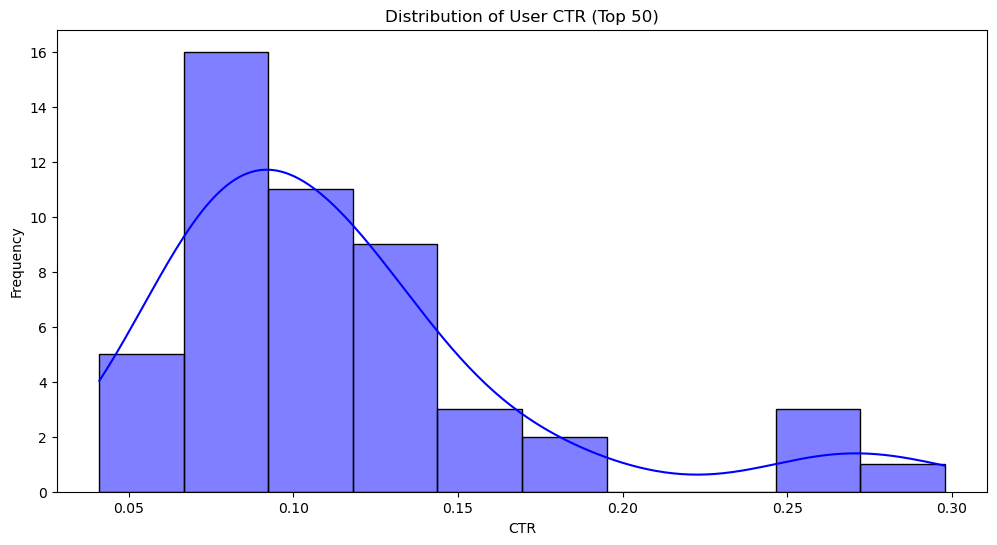

In [66]:
plt.figure(figsize=(12, 6))
sns.histplot(top_50_users['CTR'], kde=True, color='blue')
plt.title('Distribution of User CTR (Top 50)')
plt.xlabel('CTR')
plt.ylabel('Frequency')
plt.show()

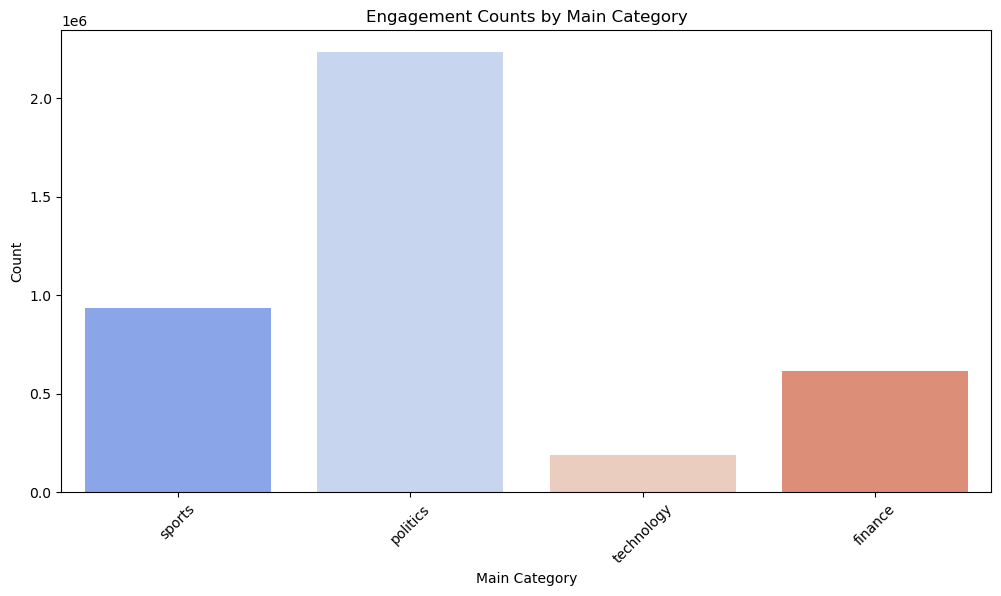

In [67]:
plt.figure(figsize=(12, 6))
sns.countplot(x='Main Category', data=all_data, palette='coolwarm')
plt.title('Engagement Counts by Main Category')
plt.xlabel('Main Category')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

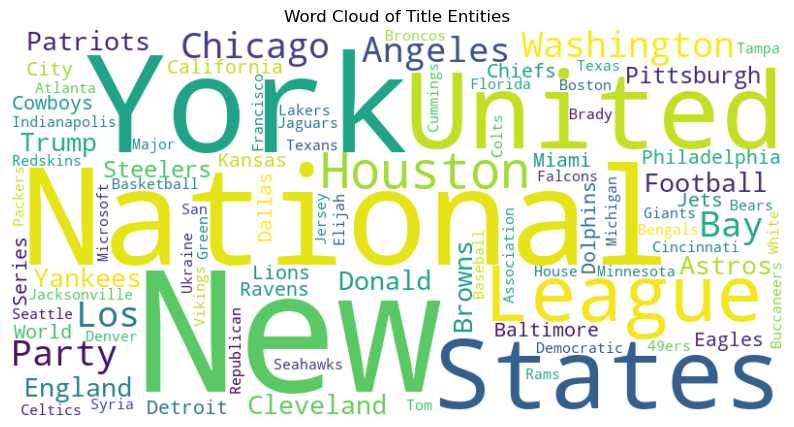

In [68]:
# Word Cloud for Entities
from wordcloud import WordCloud
entity_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(
    ' '.join(entity_counts['Entity'])
)
plt.figure(figsize=(10, 6))
plt.imshow(entity_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Title Entities')
plt.show()

In [69]:
# Extract peak active hours
behaviors['Hour'] = behaviors['Time'].dt.hour
peak_hours = behaviors['Hour'].value_counts().sort_index()

In [70]:
print(peak_hours)

0      15071
1      16448
2      24847
3      44167
4      77672
5     122882
6     152483
7     168434
8     176084
9     151179
10    173596
11    179368
12    159827
13    149316
14    122446
15     94245
16     90618
17     74841
18     64459
19     52683
20     42809
21     35965
22     24643
23     18665
Name: Hour, dtype: int64


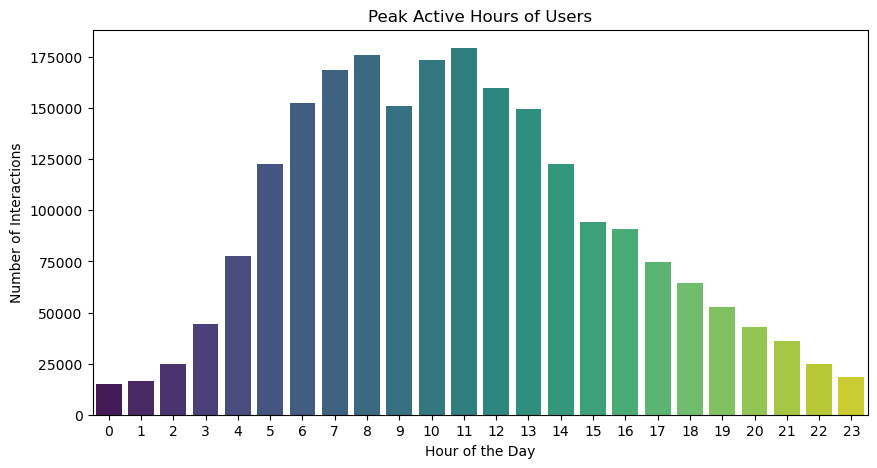

In [71]:
plt.figure(figsize=(10, 5))
sns.barplot(x=peak_hours.index, y=peak_hours.values, palette='viridis')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Interactions')
plt.title('Peak Active Hours of Users')
plt.show()

In [72]:
# Save CSV Outputs
popular_categories.to_csv('popular_categories.csv', index=False)
ctr_by_category.to_csv('ctr_by_category.csv', index=False)
entity_counts.to_csv('entity_trends.csv', index=False)
user_news_counts.to_csv('user_news_counts.csv', index=False)
user_engagement.to_csv('user_engagement.csv', index=False)

In [73]:
entity_embeddings = {row[0]: row[1:].values.astype(float) for _, row in entity_embedding.iterrows()}

In [74]:
def get_embedding(entity):
    if isinstance(entity, dict):
        entity = entity.get('Label')
    return entity_embeddings.get(entity, np.zeros(len(next(iter(entity_embeddings.values())))))


In [75]:
user_history_entities = news['Title Entities'].explode().dropna()
user_embedding = np.mean([get_embedding(entity) for entity in user_history_entities], axis=0)

In [76]:
# Similarity with articles
news['Similarity'] = news['Title Entities'].apply(
    lambda entities: cosine_similarity([user_embedding], [
        np.mean([get_embedding(e) for e in entities], axis=0)])[0][0]
    if entities else 0
)

In [77]:
# Recommendations
top_recommendations = news.nlargest(10, 'Similarity')
top_recommendations.to_csv('recommendations.csv', index=False)

Business Insights:

1. Users engage more with politics news; consider pushing notifications for trending political topics.

2. Articles with medium length (100-200 words) tend to receive higher engagement.

3. Peak activity hours are between 10 AM - 8 PM, suggesting optimal push notification times.
